In [1]:
#load libraries
import warnings
warnings.filterwarnings("ignore")
import csv;
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pandas as pd

In [2]:
#load tweets
anger_data=pd.read_csv("angertweets.txt",sep="\\n",header=None,encoding="utf-8",names={"tweets"})
fear_data=pd.read_csv("feartweets.txt",sep="\\n",header=None,encoding="utf-8",names={"tweets"})
sad_data=pd.read_csv("sadtweets.txt",sep="\\n",header=None,encoding="utf-8",names={"tweets"})
joy_data=pd.read_csv("joytweets.txt",sep="\\n",header=None,encoding="utf-8",names={"tweets"})
anticipation_data=pd.read_csv("anticipationtweets.txt",sep="\\n",header=None,encoding="utf-8",names={"tweets"})
disgust_data=pd.read_csv("disgusttweets.txt",sep="\\n",header=None,encoding="utf-8",names={"tweets"})
surprise_data=pd.read_csv("surprisetweets.txt",sep="\\n",header=None,encoding="utf-8",names={"tweets"})
trust_data=pd.read_csv("trusttweets.txt",sep="\\n",header=None,encoding="utf-8",names={"tweets"})

In [3]:
train_x=pd.read_csv("train.csv",sep=",",encoding="utf-8")
train_y=train_x[['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']]
train_x=train_x.iloc[:,0:1]

In [4]:
def name_em(df):
    arr=[]
    for i,val in enumerate(df.iterrows()):
        lbl=[]
        if(df.iloc[i,0]==1):
            lbl.append('anger')
        if(df.iloc[i,4]==1):
            lbl.append('anticipation')
        if(df.iloc[i,5]==1):
            lbl.append('disgust')
        if(df.iloc[i,1]==1):
            lbl.append('fear')
        if(df.iloc[i,3]==1):
            lbl.append('joy')
        if(df.iloc[i,2]==1):
            lbl.append('sad')
        if(df.iloc[i,6]==1):
            lbl.append('surprise')
        if(df.iloc[i,7]==1):
            lbl.append('trust')
        
        arr.append(lbl)
    return arr

In [5]:
test_x=pd.read_csv("test.csv",sep=",",encoding="utf-8")
test_y=test_x[['anger','anticipation','disgust','fear','joy','sadness','surprise','trust']]
test_x=test_x.iloc[:,0:1]

In [6]:
train_y["classes"]=np.array(name_em(train_y))
test_y["classes"]=np.array(name_em(test_y))

In [7]:
#hashtag extraction into another column
import re
anger_data["hashtag"] = anger_data["tweets"].apply(lambda x: re.findall(r"#(\w+)", x))
fear_data["hashtag"] = fear_data["tweets"].apply(lambda x: re.findall(r"#(\w+)", x))
sad_data["hashtag"] = sad_data["tweets"].apply(lambda x: re.findall(r"#(\w+)", x))
joy_data["hashtag"] = joy_data["tweets"].apply(lambda x: re.findall(r"#(\w+)", x))

anticipation_data["hashtag"] = anticipation_data["tweets"].apply(lambda x: re.findall(r"#(\w+)", x))
disgust_data["hashtag"] = disgust_data["tweets"].apply(lambda x: re.findall(r"#(\w+)", x))
surprise_data["hashtag"] = surprise_data["tweets"].apply(lambda x: re.findall(r"#(\w+)", x))
trust_data["hashtag"] = trust_data["tweets"].apply(lambda x: re.findall(r"#(\w+)", x))


train_x["hashtag"]=train_x["tweets"].apply(lambda x: re.findall(r"#(\w+)", x))
test_x["hashtag"]=test_x["tweets"].apply(lambda x: re.findall(r"#(\w+)", x))

In [8]:
import preprocessor as p
#forming a separate feature for cleaned tweets (remove urls and mentions and handle emojis)
anger_data["tweets"]=anger_data["tweets"].apply(lambda x: p.clean(x))
fear_data["tweets"]=fear_data["tweets"].apply(lambda x: p.clean(x))
sad_data["tweets"]=sad_data["tweets"].apply(lambda x: p.clean(x))
joy_data["tweets"]=joy_data["tweets"].apply(lambda x: p.clean(x))

anticipation_data["tweets"] = anticipation_data["tweets"].apply(lambda x: p.clean(x))
disgust_data["tweets"] = disgust_data["tweets"].apply(lambda x: p.clean(x))
surprise_data["tweets"] = surprise_data["tweets"].apply(lambda x: p.clean(x))
trust_data["tweets"] = trust_data["tweets"].apply(lambda x: p.clean(x))

train_x["tweets"]=train_x["tweets"].apply(lambda x: p.clean(x))
test_x["tweets"]=test_x["tweets"].apply(lambda x: p.clean(x))

In [9]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

In [10]:
#remove numbers and lower characters
anger_data["tweets"]=anger_data["tweets"].apply(lambda x: str(x).replace('\d+', ''))
anger_data["tweets"]=anger_data["tweets"].apply(lambda x: str(x).lower())

fear_data["tweets"]=fear_data["tweets"].apply(lambda x: str(x).replace('\d+', ''))
fear_data["tweets"]=fear_data["tweets"].apply(lambda x: str(x).lower())

joy_data["tweets"]=joy_data["tweets"].apply(lambda x: str(x).replace('\d+', ''))
joy_data["tweets"]=joy_data["tweets"].apply(lambda x: str(x).lower())

sad_data["tweets"]=sad_data["tweets"].apply(lambda x: str(x).replace('\d+', ''))
sad_data["tweets"]=sad_data["tweets"].apply(lambda x: str(x).lower())

anticipation_data["tweets"]=anticipation_data["tweets"].apply(lambda x: str(x).replace('\d+', ''))
anticipation_data["tweets"]=anticipation_data["tweets"].apply(lambda x: str(x).lower())

disgust_data["tweets"]=disgust_data["tweets"].apply(lambda x: str(x).replace('\d+', ''))
disgust_data["tweets"]=disgust_data["tweets"].apply(lambda x: str(x).lower())

surprise_data["tweets"]=surprise_data["tweets"].apply(lambda x: str(x).replace('\d+', ''))
surprise_data["tweets"]=surprise_data["tweets"].apply(lambda x: str(x).lower())

trust_data["tweets"]=trust_data["tweets"].apply(lambda x: str(x).replace('\d+', ''))
trust_data["tweets"]=trust_data["tweets"].apply(lambda x: str(x).lower())

train_x["tweets"]=train_x["tweets"].apply(lambda x: str(x).replace('\d+', ''))
train_x["tweets"]=train_x["tweets"].apply(lambda x: str(x).lower())

test_x["tweets"]=test_x["tweets"].apply(lambda x: str(x).replace('\d+', ''))
test_x["tweets"]=test_x["tweets"].apply(lambda x: str(x).lower())

In [11]:
#remove punctuation function
def remove_punctuation(words):
 new_words = []
 for word in words.split(' '):
    new_word = re.sub(r'[^\w\s]', '', (word))
    if new_word != '':
       new_words.append(new_word)
 return new_words

In [12]:
#remove punctuations
anger_data["tweets"]=anger_data["tweets"].apply(lambda x: remove_punctuation(x))

fear_data["tweets"]=fear_data["tweets"].apply(lambda x: remove_punctuation(x))

joy_data["tweets"]=joy_data["tweets"].apply(lambda x: remove_punctuation(x))

sad_data["tweets"]=sad_data["tweets"].apply(lambda x: remove_punctuation(x))

anticipation_data["tweets"]=anticipation_data["tweets"].apply(lambda x: remove_punctuation(x))

disgust_data["tweets"]=disgust_data["tweets"].apply(lambda x: remove_punctuation(x))

surprise_data["tweets"]=surprise_data["tweets"].apply(lambda x: remove_punctuation(x))

trust_data["tweets"]=trust_data["tweets"].apply(lambda x: remove_punctuation(x))

train_x["tweets"]=train_x["tweets"].apply(lambda x: remove_punctuation(x))

test_x["tweets"]=test_x["tweets"].apply(lambda x: remove_punctuation(x))

In [13]:
#lemmatizer function
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

In [14]:
#lemmatizing tweets
anger_data["tweets"]=anger_data["tweets"].apply(lambda x: ' '.join(lemmatize_text(' '.join(x))))

fear_data["tweets"]=fear_data["tweets"].apply(lambda x: ' '.join(lemmatize_text(' '.join(x))))

joy_data["tweets"]=joy_data["tweets"].apply(lambda x: ' '.join(lemmatize_text(' '.join(x))))

sad_data["tweets"]=sad_data["tweets"].apply(lambda x: ' '.join(lemmatize_text(' '.join(x))))

anticipation_data["tweets"]=anticipation_data["tweets"].apply(lambda x: ' '.join(lemmatize_text(' '.join(x))))

disgust_data["tweets"]=disgust_data["tweets"].apply(lambda x: ' '.join(lemmatize_text(' '.join(x))))

surprise_data["tweets"]=surprise_data["tweets"].apply(lambda x: ' '.join(lemmatize_text(' '.join(x))))

trust_data["tweets"]=trust_data["tweets"].apply(lambda x: ' '.join(lemmatize_text(' '.join(x))))

train_x["tweets"]=train_x["tweets"].apply(lambda x: ' '.join(lemmatize_text(' '.join(x))))

test_x["tweets"]=test_x["tweets"].apply(lambda x: ' '.join(lemmatize_text(' '.join(x))))

In [15]:
#remove stop words
stop_words = set(stopwords.words('english'))
anger_data["tweets"] = anger_data["tweets"].apply(lambda x: [wrd for wrd in str(x).split(" ") if wrd not in stop_words])

fear_data["tweets"] = fear_data["tweets"].apply(lambda x: [wrd for wrd in str(x).split(" ") if wrd not in stop_words])

sad_data["tweets"] = sad_data["tweets"].apply(lambda x: [wrd for wrd in str(x).split(" ") if wrd not in stop_words])

joy_data["tweets"] = joy_data["tweets"].apply(lambda x: [wrd for wrd in str(x).split(" ") if wrd not in stop_words])

anticipation_data["tweets"] = anticipation_data["tweets"].apply(lambda x: [wrd for wrd in str(x).split(" ") if wrd not in stop_words])

disgust_data["tweets"] = disgust_data["tweets"].apply(lambda x: [wrd for wrd in str(x).split(" ") if wrd not in stop_words])

surprise_data["tweets"] = surprise_data["tweets"].apply(lambda x: [wrd for wrd in str(x).split(" ") if wrd not in stop_words])

trust_data["tweets"] = trust_data["tweets"].apply(lambda x: [wrd for wrd in str(x).split(" ") if wrd not in stop_words])

train_x["tweets"] = train_x["tweets"].apply(lambda x: [wrd for wrd in str(x).split(" ") if wrd not in stop_words])

test_x["tweets"] = test_x["tweets"].apply(lambda x: [wrd for wrd in str(x).split(" ") if wrd not in stop_words])

In [16]:
#remove single characters
anger_data["tweets"] = anger_data["tweets"].apply(lambda x: [wrd for wrd in x if len(wrd)>1])

fear_data["tweets"] = fear_data["tweets"].apply(lambda x: [wrd for wrd in x if len(wrd)>1])

sad_data["tweets"] = sad_data["tweets"].apply(lambda x: [wrd for wrd in x if len(wrd)>1])

joy_data["tweets"] = joy_data["tweets"].apply(lambda x: [wrd for wrd in x if len(wrd)>1])

anticipation_data["tweets"] = anticipation_data["tweets"].apply(lambda x: [wrd for wrd in x if len(wrd)>1])

disgust_data["tweets"] = disgust_data["tweets"].apply(lambda x: [wrd for wrd in x if len(wrd)>1])

surprise_data["tweets"] = surprise_data["tweets"].apply(lambda x: [wrd for wrd in x if len(wrd)>1])

trust_data["tweets"] = trust_data["tweets"].apply(lambda x: [wrd for wrd in x if len(wrd)>1])

train_x["tweets"] = train_x["tweets"].apply(lambda x: [wrd for wrd in x if len(wrd)>1])

test_x["tweets"] = test_x["tweets"].apply(lambda x: [wrd for wrd in x if len(wrd)>1])

In [17]:
#concatenate tweets and hashtags in one column
anger_data["tweets"]=anger_data["tweets"]+anger_data["hashtag"]
fear_data["tweets"]=fear_data["tweets"]+fear_data["hashtag"]
sad_data["tweets"]=sad_data["tweets"]+sad_data["hashtag"]
joy_data["tweets"]=joy_data["tweets"]+joy_data["hashtag"]

anticipation_data["tweets"]=anticipation_data["tweets"]+anticipation_data["hashtag"]
disgust_data["tweets"]=disgust_data["tweets"]+disgust_data["hashtag"]
surprise_data["tweets"]=surprise_data["tweets"]+surprise_data["hashtag"]
trust_data["tweets"]=trust_data["tweets"]+trust_data["hashtag"]

train_x["tweets"]=train_x["tweets"]+train_x["hashtag"]
test_x["tweets"]=test_x["tweets"]+test_x["hashtag"]

In [18]:
#tweets format in single lines
anger_data["tweets"]=anger_data["tweets"].apply(lambda x: ' '.join(x))
fear_data["tweets"]=fear_data["tweets"].apply(lambda x: ' '.join(x))
sad_data["tweets"]=sad_data["tweets"].apply(lambda x: ' '.join(x))
joy_data["tweets"]=joy_data["tweets"].apply(lambda x: ' '.join(x))

anticipation_data["tweets"]=anticipation_data["tweets"].apply(lambda x: ' '.join(x))
disgust_data["tweets"]=disgust_data["tweets"].apply(lambda x: ' '.join(x))
surprise_data["tweets"]=surprise_data["tweets"].apply(lambda x: ' '.join(x))
trust_data["tweets"]=trust_data["tweets"].apply(lambda x: ' '.join(x))

train_x["tweets"]=train_x["tweets"].apply(lambda x: ' '.join(x))
test_x["tweets"]=test_x["tweets"].apply(lambda x: ' '.join(x))

In [19]:
#format single line to each tweet type
anger=' '.join(anger_data['tweets'])
fear=' '.join(fear_data['tweets'])
joy=' '.join(joy_data['tweets'])
sad=' '.join(sad_data['tweets'])

anticipation=' '.join(anticipation_data['tweets'])
disgust=' '.join(disgust_data['tweets'])
surprise=' '.join(surprise_data['tweets'])
trust=' '.join(trust_data['tweets'])

train=' '.join(train_x['tweets'])
test=' '.join(test_x['tweets'])

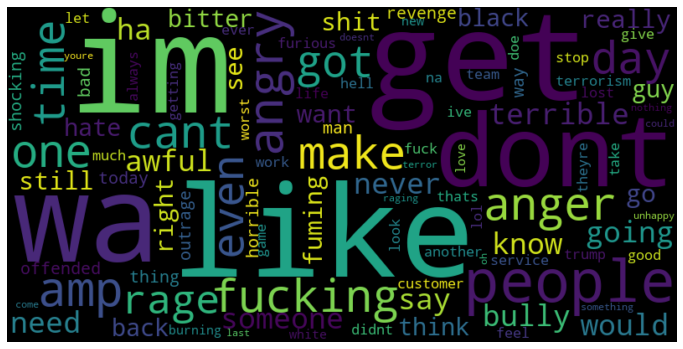

In [20]:
#word cloud of anger
from wordcloud import WordCloud
#Frequency of words
anger_fdist = FreqDist(nltk.tokenize.word_tokenize(anger))
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(anger_fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

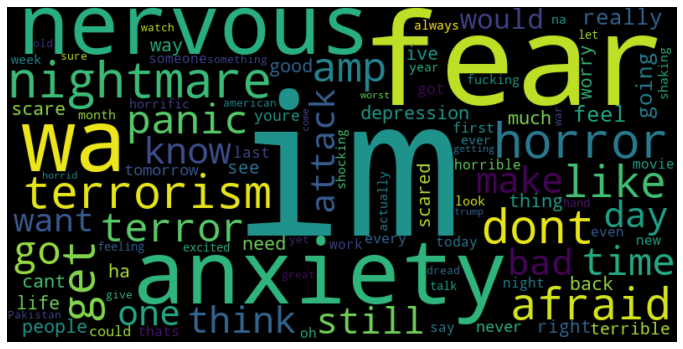

In [21]:
#word cloud of fear
from wordcloud import WordCloud
#Frequency of words
fear_fdist = FreqDist(nltk.tokenize.word_tokenize(fear))
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(fear_fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

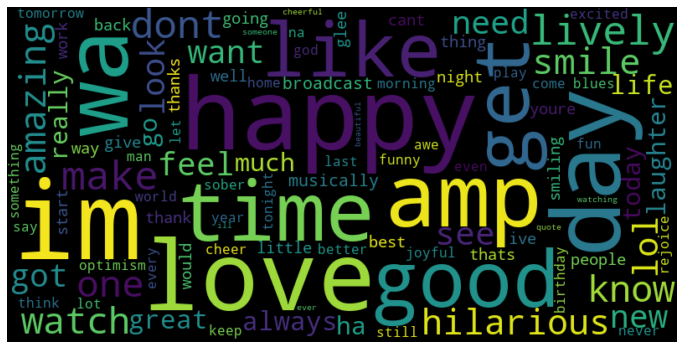

In [22]:
#word cloud of joy
from wordcloud import WordCloud
#Frequency of words
joy_fdist = FreqDist(nltk.tokenize.word_tokenize(joy))
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(joy_fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

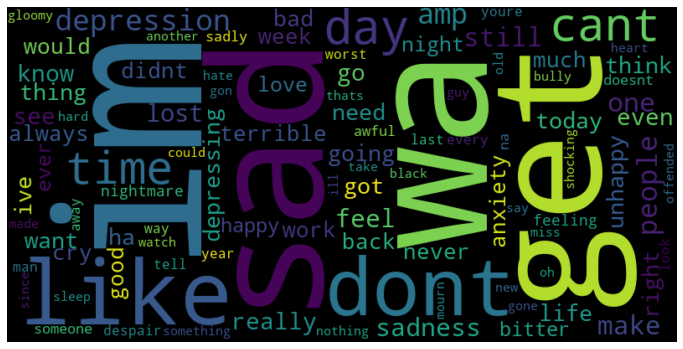

In [23]:
#word cloud of sad
from wordcloud import WordCloud
#Frequency of words
sad_fdist = FreqDist(nltk.tokenize.word_tokenize(sad))
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(sad_fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

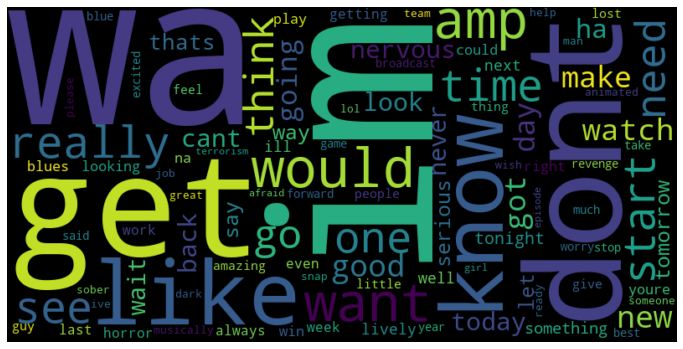

In [24]:
#word cloud of anticipation
from wordcloud import WordCloud
#Frequency of words
anticipation_fdist = FreqDist(nltk.tokenize.word_tokenize(anticipation))
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(anticipation_fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

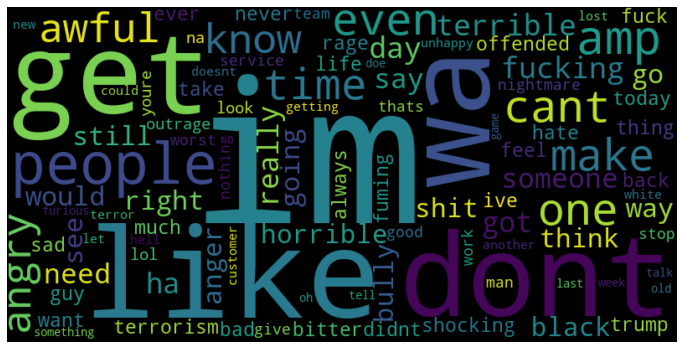

In [25]:
#word cloud of disgust
from wordcloud import WordCloud
#Frequency of words
disgust_fdist = FreqDist(nltk.tokenize.word_tokenize(disgust))
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(disgust_fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

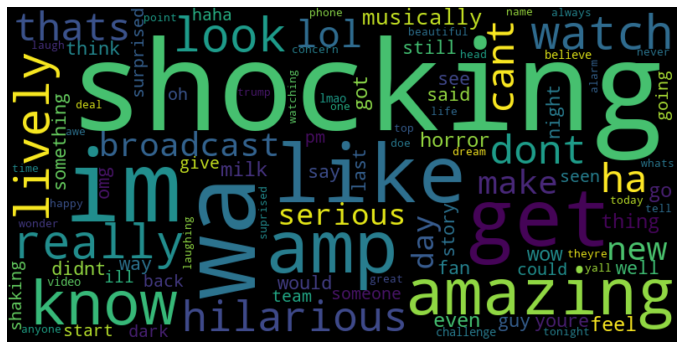

In [26]:
#word cloud of surprise
from wordcloud import WordCloud
#Frequency of words
surprise_fdist = FreqDist(nltk.tokenize.word_tokenize(surprise))
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(surprise_fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

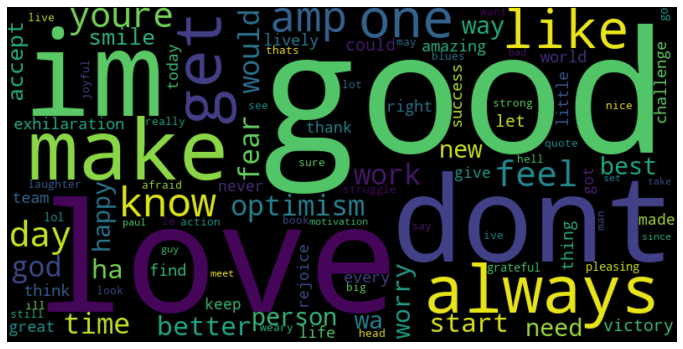

In [27]:
#word cloud of trust
from wordcloud import WordCloud
#Frequency of words
trust_fdist = FreqDist(nltk.tokenize.word_tokenize(trust))
#WordCloud
wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(trust_fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
#compute probability of Freqdist to tweet tokens to each emotion class
def fdist_tweet(tweet, emotion):
    p_fdist=0
    wrds=tweet.split(' ')
    if (emotion=='angry'):
        for wrd in wrds:
            if(wrd in anger_fdist.keys()):
                p_fdist=p_fdist+anger_fdist.get(wrd)
        p_fdist=p_fdist/len(anger_fdist.keys())
    elif (emotion=='fear'):
        for wrd in wrds:
            if(wrd in fear_fdist.keys()):
                p_fdist=p_fdist+fear_fdist.get(wrd)
        p_fdist=p_fdist/len(fear_fdist.keys())
    elif (emotion=='joy'):
        for wrd in wrds:
            if(wrd in joy_fdist.keys()):
                p_fdist=p_fdist+joy_fdist.get(wrd)
        p_fdist=p_fdist/len(joy_fdist.keys())
    elif (emotion=='sad'):
        for wrd in wrds:
            if(wrd in sad_fdist.keys()):
                p_fdist=p_fdist+sad_fdist.get(wrd)
        p_fdist=p_fdist/len(sad_fdist.keys())
    elif (emotion=='anticipation'):
        for wrd in wrds:
            if(wrd in anticipation_fdist.keys()):
                p_fdist=p_fdist+anticipation_fdist.get(wrd)
        p_fdist=p_fdist/len(anticipation_fdist.keys())
    elif (emotion=='disgust'):
        for wrd in wrds:
            if(wrd in disgust_fdist.keys()):
                p_fdist=p_fdist+disgust_fdist.get(wrd)
        p_fdist=p_fdist/len(disgust_fdist.keys())
    elif (emotion=='surprise'):
        for wrd in wrds:
            if(wrd in surprise_fdist.keys()):
                p_fdist=p_fdist+surprise_fdist.get(wrd)
        p_fdist=p_fdist/len(surprise_fdist.keys())
    elif (emotion=='trust'):
        for wrd in wrds:
            if(wrd in trust_fdist.keys()):
                p_fdist=p_fdist+trust_fdist.get(wrd)
        p_fdist=p_fdist/len(trust_fdist.keys())
        
    
    return np.round(p_fdist,3)

In [29]:
train_x["fdist_anger"]=train_x["tweets"].apply(lambda x: fdist_tweet(x,'angry'))
train_x["fdist_fear"]=train_x["tweets"].apply(lambda x: fdist_tweet(x,'fear'))
train_x["fdist_joy"]=train_x["tweets"].apply(lambda x: fdist_tweet(x,'joy'))
train_x["fdist_sad"]=train_x["tweets"].apply(lambda x: fdist_tweet(x,'sad'))

train_x["fdist_anticipation"]=train_x["tweets"].apply(lambda x: fdist_tweet(x,'anticipation'))
train_x["fdist_disgust"]=train_x["tweets"].apply(lambda x: fdist_tweet(x,'disgust'))
train_x["fdist_surprise"]=train_x["tweets"].apply(lambda x: fdist_tweet(x,'surprise'))
train_x["fdist_trust"]=train_x["tweets"].apply(lambda x: fdist_tweet(x,'trust'))

In [30]:
test_x["fdist_anger"]=test_x["tweets"].apply(lambda x: fdist_tweet(x,'angry'))
test_x["fdist_fear"]=test_x["tweets"].apply(lambda x: fdist_tweet(x,'fear'))
test_x["fdist_joy"]=test_x["tweets"].apply(lambda x: fdist_tweet(x,'joy'))
test_x["fdist_sad"]=test_x["tweets"].apply(lambda x: fdist_tweet(x,'sad'))

test_x["fdist_anticipation"]=test_x["tweets"].apply(lambda x: fdist_tweet(x,'anticipation'))
test_x["fdist_disgust"]=test_x["tweets"].apply(lambda x: fdist_tweet(x,'disgust'))
test_x["fdist_surprise"]=test_x["tweets"].apply(lambda x: fdist_tweet(x,'surprise'))
test_x["fdist_trust"]=test_x["tweets"].apply(lambda x: fdist_tweet(x,'trust'))

In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
def get_wrdcenter(vectors,keys,plt_pca):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(vectors)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])
    principalDf ["vocab"]=keys
    if (plt_pca):
        plt.figure(figsize = (15,15))
        plt.ylabel('Principal Component 1', fontsize = 15)
        plt.xlabel('Principal Component 2', fontsize = 15)
        plt.title('2 component PCA', fontsize = 20)
        plt.scatter(principalDf["PCA1"],principalDf["PCA2"])
        for i,val in principalDf.iterrows():
            plt.annotate(val["vocab"],xy=(val["PCA1"],val["PCA2"]))
    kmeans = KMeans(n_clusters=1)
    kmeans.fit(principalDf.iloc[:,0:2])
    kmeans.cluster_centers_
    principalDf["differ1"]=principalDf["PCA1"].apply(lambda x: x-kmeans.cluster_centers_[0][0] if (x>kmeans.cluster_centers_[0][0]) else kmeans.cluster_centers_[0][0]-x)
    principalDf["differ2"]=principalDf["PCA2"].apply(lambda x: x-kmeans.cluster_centers_[0][1] if (x>kmeans.cluster_centers_[0][1]) else kmeans.cluster_centers_[0][1]-x)
    return principalDf.sort_values(["differ1","differ2"], ascending=True).iloc[0]["vocab"]

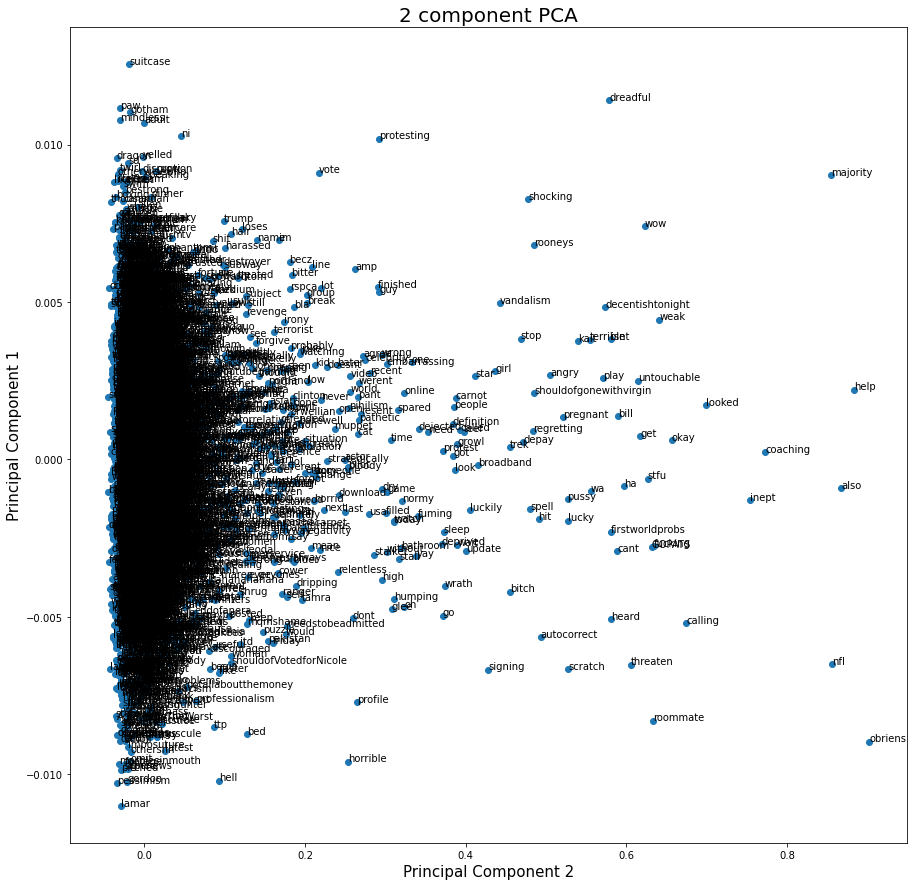

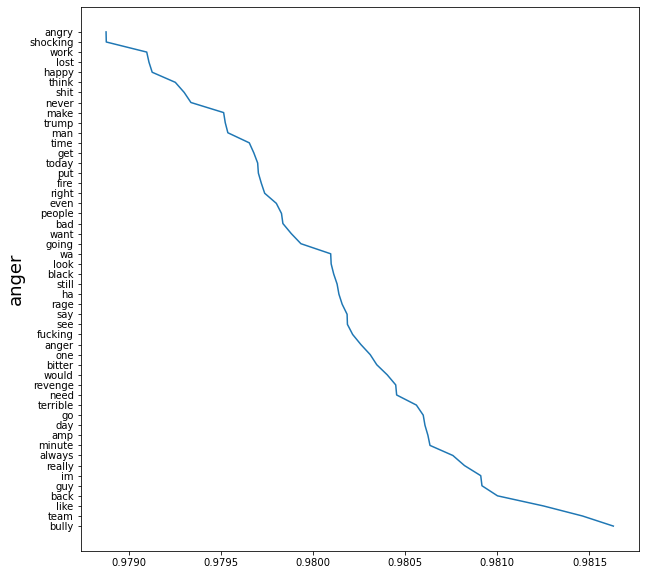

In [32]:
from gensim.models import Word2Vec
angerw2v=Word2Vec(anger_data["tweets"].apply(lambda x: str(x).split(" ")),size=100,min_count=1,window=5)
angerw2v.train(anger_data["tweets"].apply(lambda x: str(x).split(" ")),total_examples=len(anger_data["tweets"].apply(lambda x: str(x).split(" "))),epochs=6)
angerwrd=get_wrdcenter(angerw2v.wv.vectors,angerw2v.wv.vocab.keys(),True)
angerw2v.save("anger8em.model")
angerdict=dict(angerw2v.most_similar(angerwrd,topn=50))
x,y=list(angerdict.keys()),list(angerdict.values())
plt.figure(figsize=(10,10))
plt.plot(y,x)
plt.ylabel('anger', fontsize=18)
plt.show()

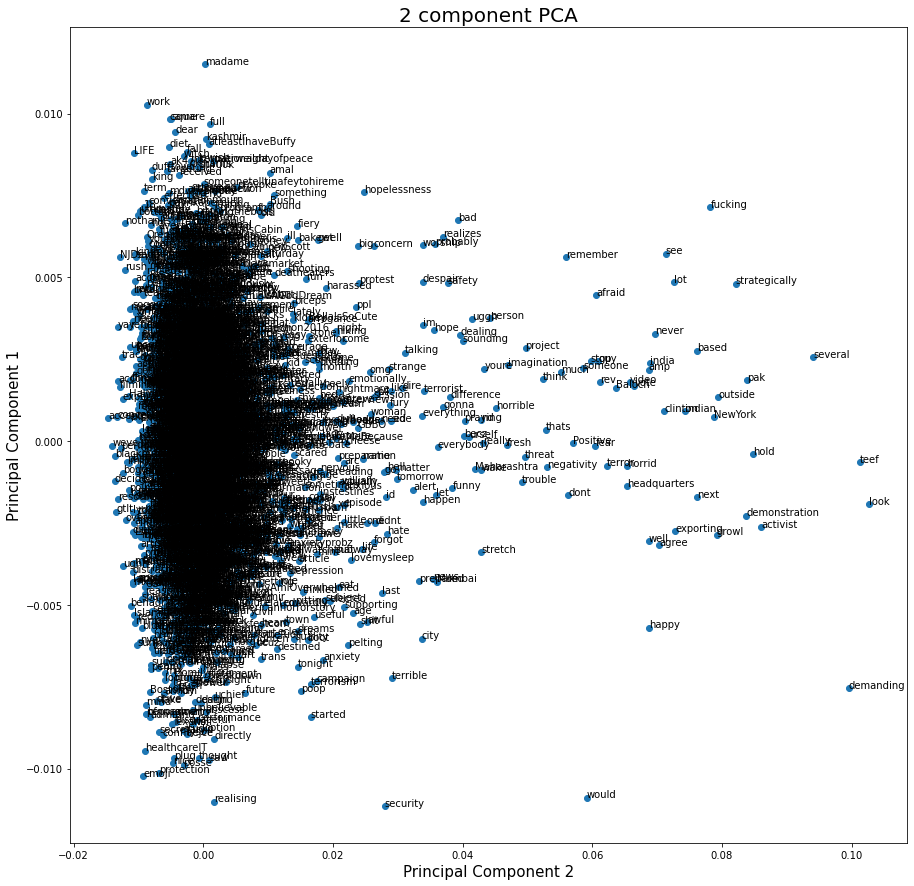

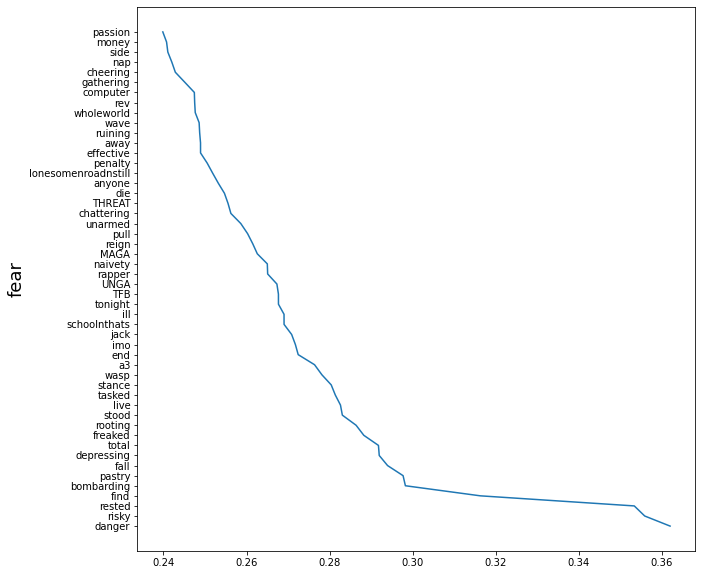

In [33]:
fearw2v=Word2Vec(fear_data["tweets"].apply(lambda x: str(x).split(" ")),size=100,min_count=1,window=5)
fearw2v.train(fear_data["tweets"].apply(lambda x: str(x).split(" ")),total_examples=len(fear_data["tweets"].apply(lambda x: str(x).split(" "))),epochs=6)
fearwrd=get_wrdcenter(fearw2v.wv.vectors,fearw2v.wv.vocab.keys(),True)
fearw2v.save("fear8em.model")
feardict=dict(fearw2v.most_similar(fearwrd,topn=50))
x,y=list(feardict.keys()),list(feardict.values())
plt.figure(figsize=(10,10))
plt.plot(y,x)
plt.ylabel('fear', fontsize=18)
plt.show()

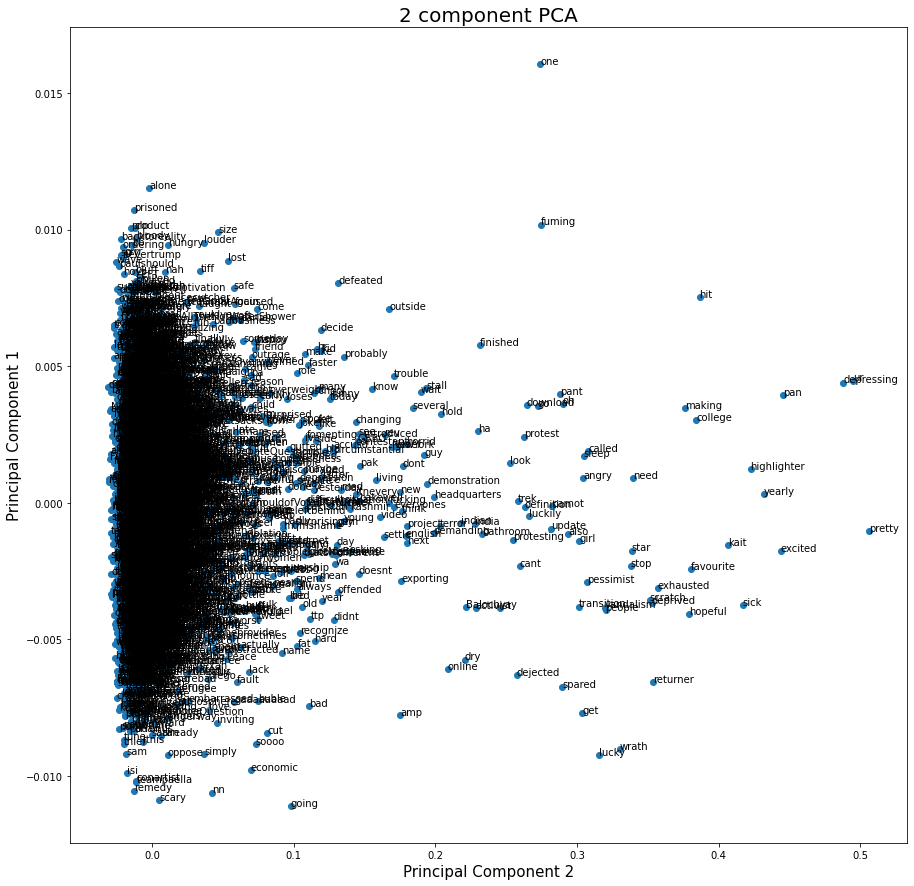

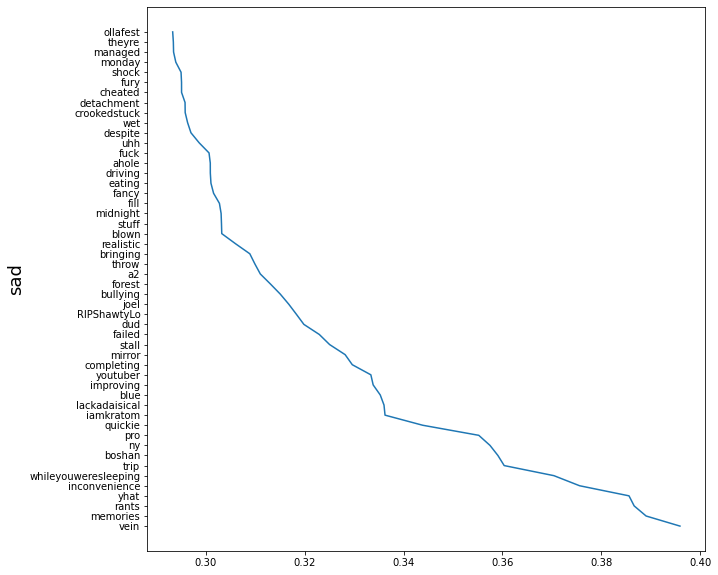

In [34]:
sadw2v=Word2Vec(sad_data["tweets"].apply(lambda x: str(x).split(" ")),size=100,min_count=1,window=5)
sadw2v.train(sad_data["tweets"].apply(lambda x: str(x).split(" ")),total_examples=len(sad_data["tweets"].apply(lambda x: str(x).split(" "))),epochs=6)
sadwrd=get_wrdcenter(sadw2v.wv.vectors,sadw2v.wv.vocab.keys(),True)
sadw2v.save("sad8em.model")
saddict=dict(sadw2v.most_similar(sadwrd,topn=50))
x,y=list(saddict.keys()),list(saddict.values())
plt.figure(figsize=(10,10))
plt.plot(y,x)
plt.ylabel('sad', fontsize=18)
plt.show()

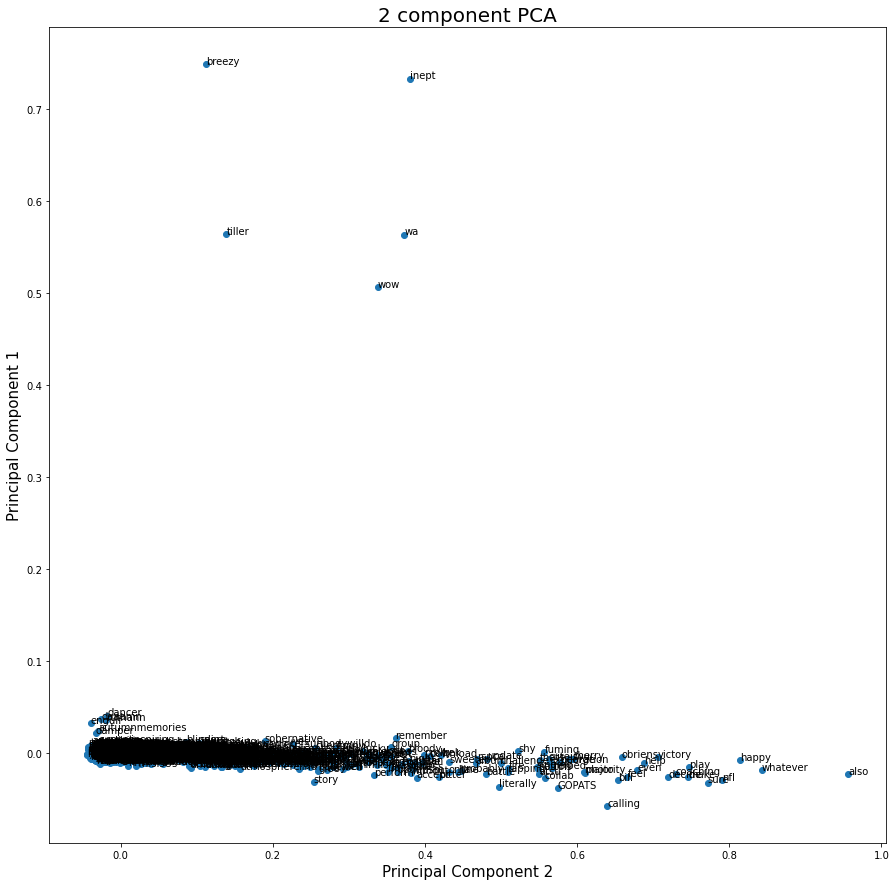

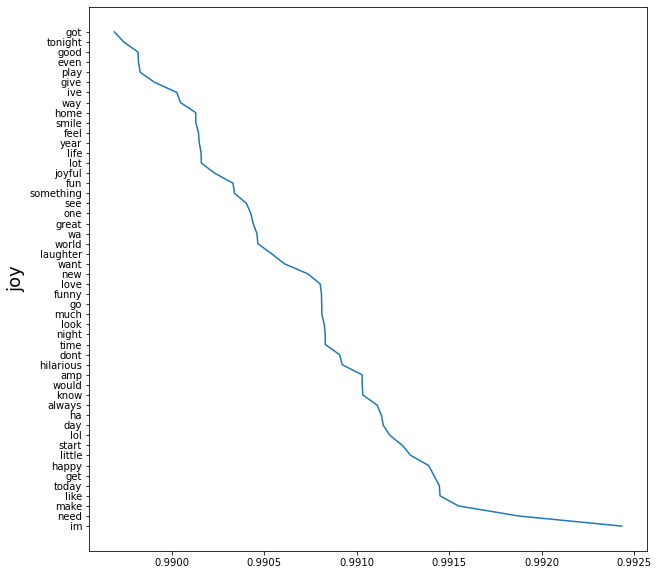

In [35]:
joyw2v=Word2Vec(joy_data["tweets"].apply(lambda x: str(x).split(" ")),size=100,min_count=1,window=5)
joyw2v.train(joy_data["tweets"].apply(lambda x: str(x).split(" ")),total_examples=len(joy_data["tweets"].apply(lambda x: str(x).split(" "))),epochs=6)
joywrd=get_wrdcenter(joyw2v.wv.vectors,joyw2v.wv.vocab.keys(),True)
joyw2v.save("joy8em.model")
joydict=dict(joyw2v.most_similar(joywrd,topn=50))
x,y=list(joydict.keys()),list(joydict.values())
plt.figure(figsize=(10,10))
plt.plot(y,x)
plt.ylabel('joy', fontsize=18)
plt.show()


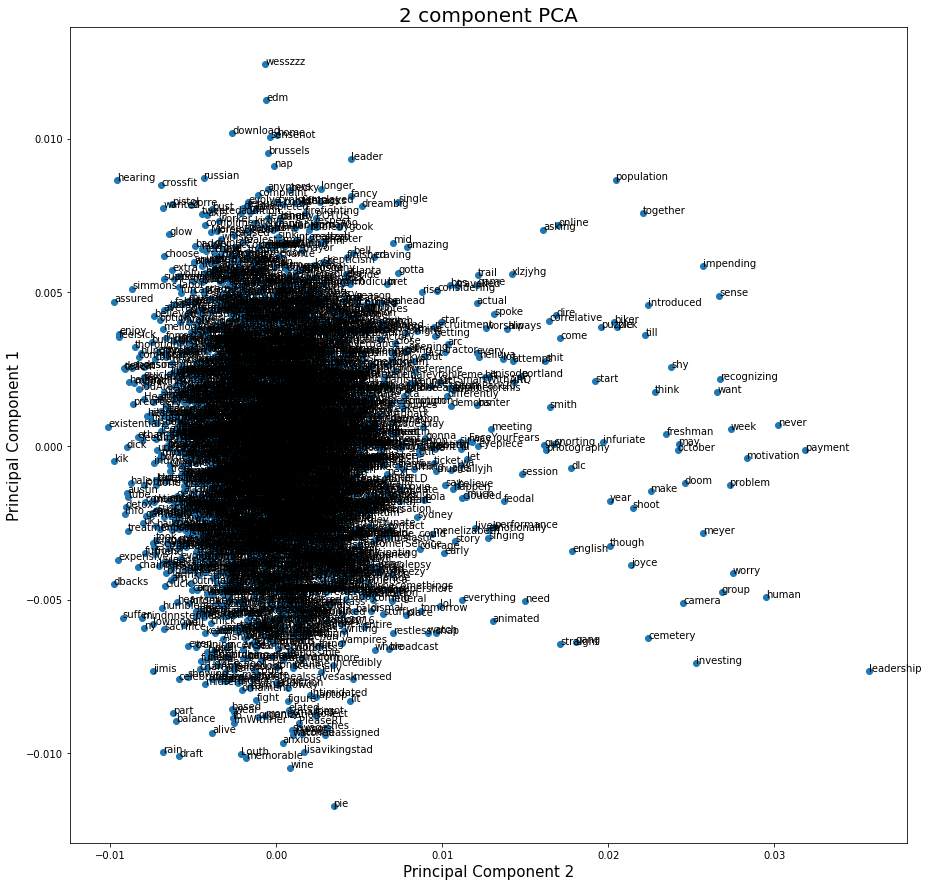

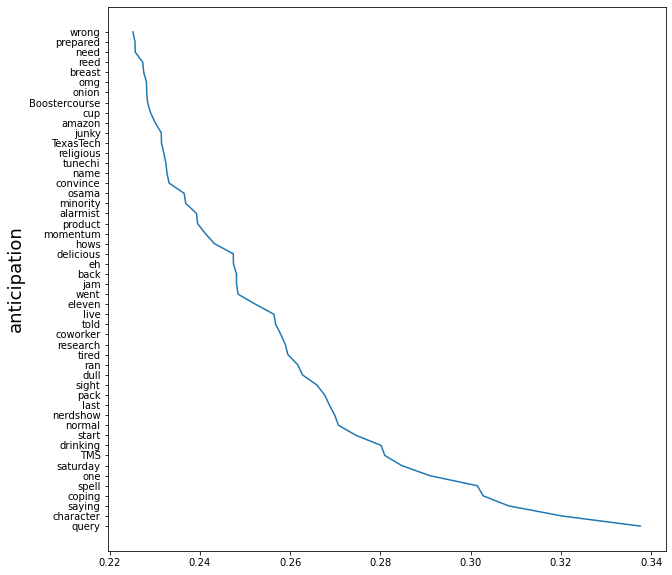

In [36]:
anticipationw2v=Word2Vec(anticipation_data["tweets"].apply(lambda x: str(x).split(" ")),size=100,min_count=1,window=5)
anticipationw2v.train(anticipation_data["tweets"].apply(lambda x: str(x).split(" ")),total_examples=len(anticipation_data["tweets"].apply(lambda x: str(x).split(" "))),epochs=6)
anticipationwrd=get_wrdcenter(anticipationw2v.wv.vectors,anticipationw2v.wv.vocab.keys(),True)
anticipationw2v.save("anticipation8em.model")
anticipationdict=dict(anticipationw2v.most_similar(anticipationwrd,topn=50))
x,y=list(anticipationdict.keys()),list(anticipationdict.values())
plt.figure(figsize=(10,10))
plt.plot(y,x)
plt.ylabel('anticipation', fontsize=18)
plt.show()

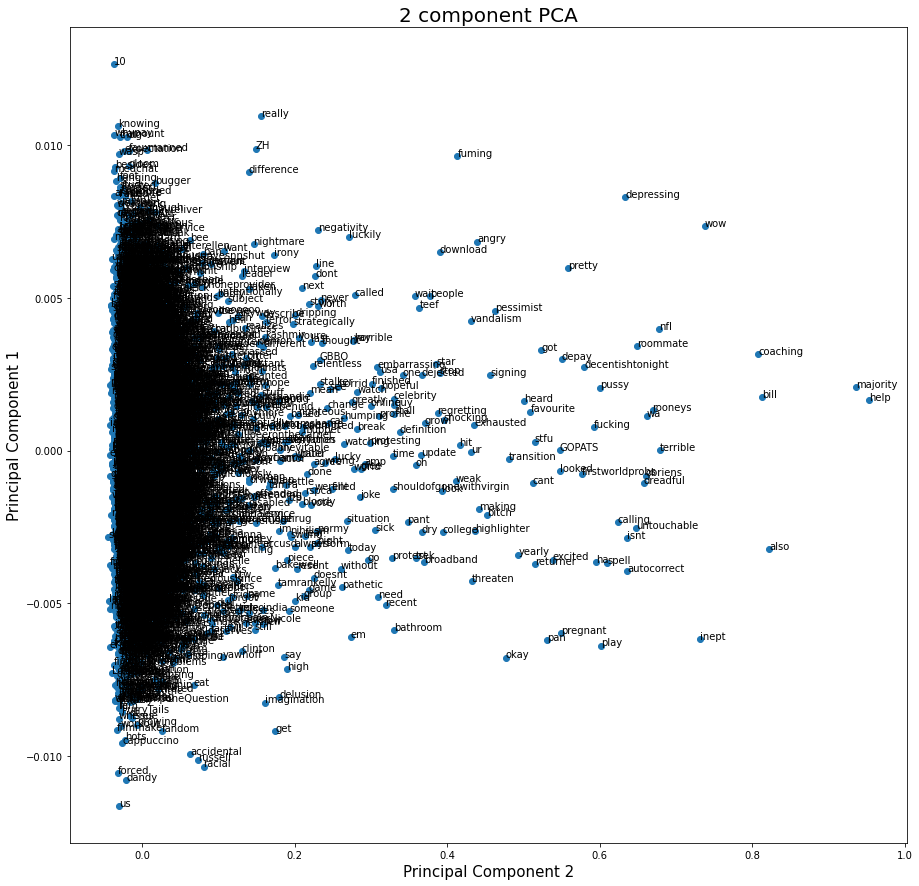

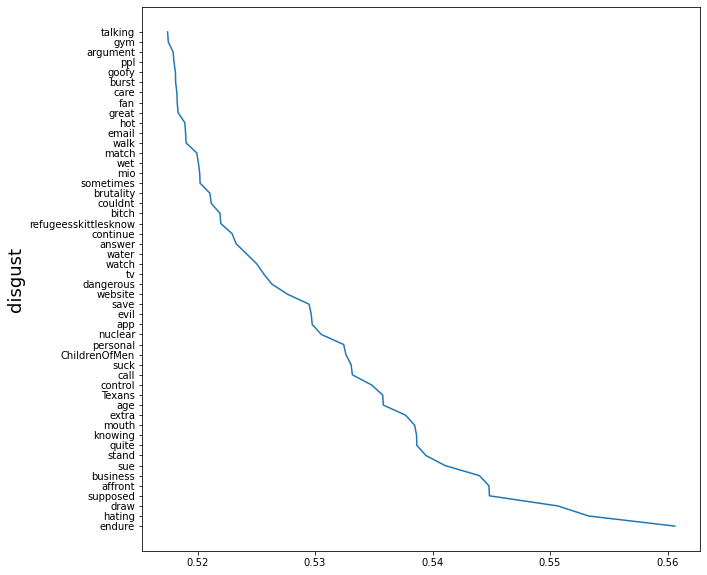

In [37]:
disgustw2v=Word2Vec(disgust_data["tweets"].apply(lambda x: str(x).split(" ")),size=100,min_count=1,window=5)
disgustw2v.train(disgust_data["tweets"].apply(lambda x: str(x).split(" ")),total_examples=len(disgust_data["tweets"].apply(lambda x: str(x).split(" "))),epochs=6)
disgustwrd=get_wrdcenter(disgustw2v.wv.vectors,disgustw2v.wv.vocab.keys(),True)
disgustw2v.save("disgust8em.model")
disgustdict=dict(disgustw2v.most_similar(disgustwrd,topn=50))
x,y=list(disgustdict.keys()),list(disgustdict.values())
plt.figure(figsize=(10,10))
plt.plot(y,x)
plt.ylabel('disgust', fontsize=18)
plt.show()

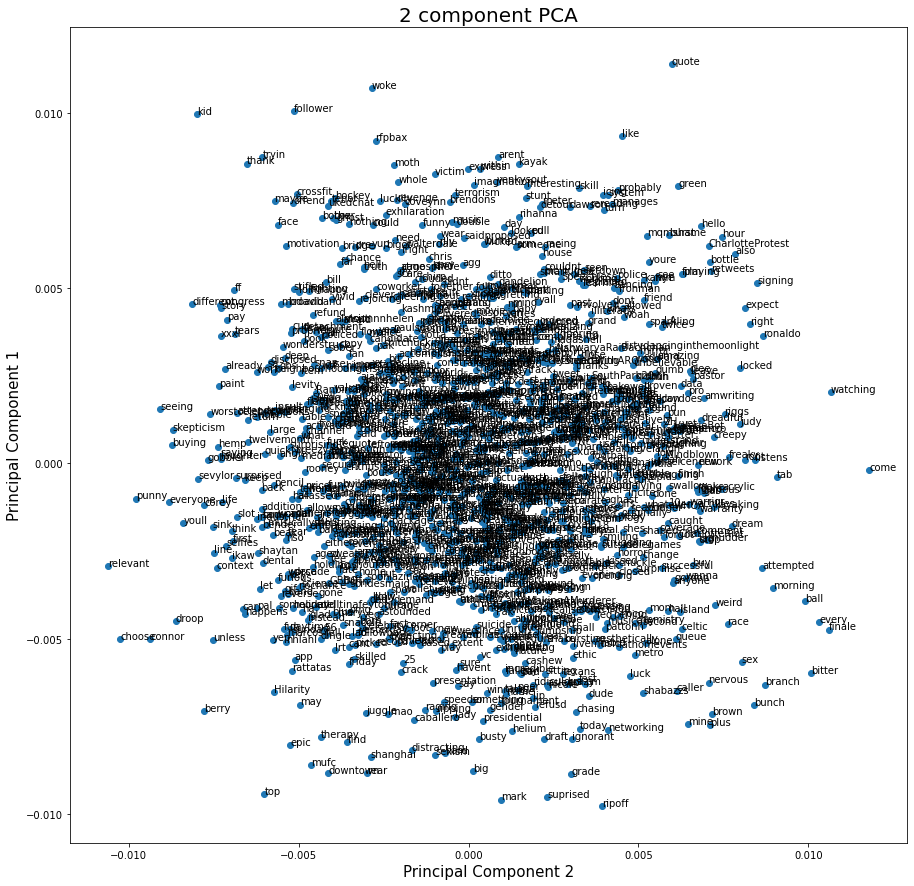

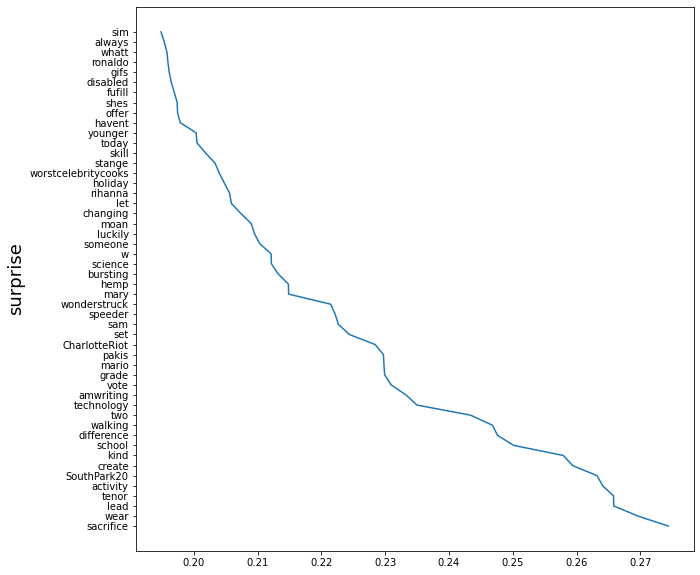

In [38]:
surprisew2v=Word2Vec(surprise_data["tweets"].apply(lambda x: str(x).split(" ")),size=100,min_count=1,window=5)
surprisew2v.train(surprise_data["tweets"].apply(lambda x: str(x).split(" ")),total_examples=len(surprise_data["tweets"].apply(lambda x: str(x).split(" "))),epochs=6)
surprisewrd=get_wrdcenter(surprisew2v.wv.vectors,surprisew2v.wv.vocab.keys(),True)
surprisew2v.save("surprise8em.model")
surprisedict=dict(surprisew2v.most_similar(surprisewrd,topn=50))
x,y=list(surprisedict.keys()),list(surprisedict.values())
plt.figure(figsize=(10,10))
plt.plot(y,x)
plt.ylabel('surprise', fontsize=18)
plt.show()

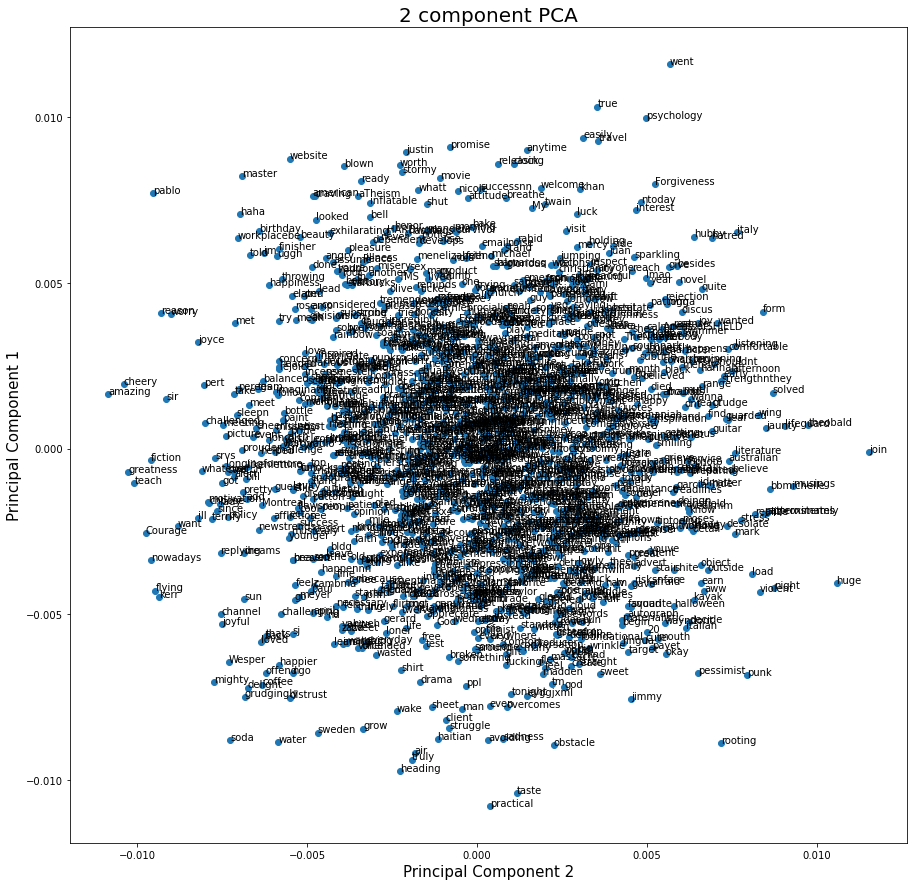

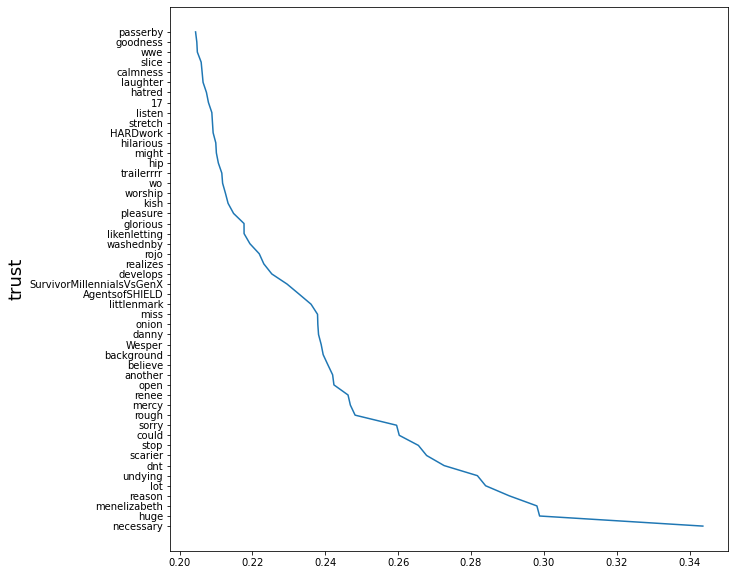

In [39]:
trustw2v=Word2Vec(trust_data["tweets"].apply(lambda x: str(x).split(" ")),size=100,min_count=1,window=5)
trustw2v.train(trust_data["tweets"].apply(lambda x: str(x).split(" ")),total_examples=len(trust_data["tweets"].apply(lambda x: str(x).split(" "))),epochs=6)
trustwrd=get_wrdcenter(trustw2v.wv.vectors,trustw2v.wv.vocab.keys(),True)
trustw2v.save("trust8em.model")
trustdict=dict(trustw2v.most_similar(trustwrd,topn=50))
x,y=list(trustdict.keys()),list(trustdict.values())
plt.figure(figsize=(10,10))
plt.plot(y,x)
plt.ylabel('trust', fontsize=18)
plt.show()

In [40]:
#compute w2vsimilarity to tweet tokens to each emotion class
def w2v_tweet(tweet, emotion,centerwrd):
    w2v_sim=0
    wrds=tweet.split(' ')
    for wrd in wrds:
        if (emotion=='angry'):
            if(wrd in angerw2v.wv.vocab.keys()):
                w2v_sim=w2v_sim+angerw2v.wv.similarity(centerwrd,wrd)
        elif (emotion=='fear'):
            if(wrd in fearw2v.wv.vocab.keys()):
                w2v_sim=w2v_sim+fearw2v.wv.similarity(centerwrd,wrd)
        elif (emotion=='joy'):
            if(wrd in joyw2v.wv.vocab.keys()):
                w2v_sim=w2v_sim+joyw2v.wv.similarity(centerwrd,wrd)
        elif (emotion=='sad'):
            if(wrd in sadw2v.wv.vocab.keys()):
                w2v_sim=w2v_sim+sadw2v.wv.similarity(centerwrd,wrd)
        elif (emotion=='anticipation'):
            if(wrd in anticipationw2v.wv.vocab.keys()):
                w2v_sim=w2v_sim+anticipationw2v.wv.similarity(centerwrd,wrd)
        elif (emotion=='disgust'):
            if(wrd in disgustw2v.wv.vocab.keys()):
                w2v_sim=w2v_sim+disgustw2v.wv.similarity(centerwrd,wrd)
        elif (emotion=='surprise'):
            if(wrd in surprisew2v.wv.vocab.keys()):
                w2v_sim=w2v_sim+surprisew2v.wv.similarity(centerwrd,wrd)
        elif (emotion=='trust'):
            if(wrd in trustw2v.wv.vocab.keys()):
                w2v_sim=w2v_sim+trustw2v.wv.similarity(centerwrd,wrd)
        
    w2v_sim=w2v_sim/len(wrds)
    return np.round(w2v_sim,3)

In [41]:
#measure tweet cosine similarity between tweets'tokens and each emotion w2v model
train_x["w2v_anger"]=train_x["tweets"].apply(lambda x: w2v_tweet(x,'angry',angerwrd))
train_x["w2v_fear"]=train_x["tweets"].apply(lambda x: w2v_tweet(x,'fear',fearwrd))
train_x["w2v_joy"]=train_x["tweets"].apply(lambda x: w2v_tweet(x,'joy',joywrd))
train_x["w2v_sad"]=train_x["tweets"].apply(lambda x: w2v_tweet(x,'sad',sadwrd))

train_x["w2v_anticipation"]=train_x["tweets"].apply(lambda x: w2v_tweet(x,'anticipation',anticipationwrd))
train_x["w2v_disgust"]=train_x["tweets"].apply(lambda x: w2v_tweet(x,'disgust',disgustwrd))
train_x["w2v_surprise"]=train_x["tweets"].apply(lambda x: w2v_tweet(x,'surprise',surprisewrd))
train_x["w2v_trust"]=train_x["tweets"].apply(lambda x: w2v_tweet(x,'trust',trustwrd))

In [42]:
test_x["w2v_anger"]=test_x["tweets"].apply(lambda x: w2v_tweet(x,'angry',angerwrd))
test_x["w2v_fear"]=test_x["tweets"].apply(lambda x: w2v_tweet(x,'fear',fearwrd))
test_x["w2v_joy"]=test_x["tweets"].apply(lambda x: w2v_tweet(x,'joy',joywrd))
test_x["w2v_sad"]=test_x["tweets"].apply(lambda x: w2v_tweet(x,'sad',sadwrd))

test_x["w2v_anticipation"]=test_x["tweets"].apply(lambda x: w2v_tweet(x,'anticipation',anticipationwrd))
test_x["w2v_disgust"]=test_x["tweets"].apply(lambda x: w2v_tweet(x,'disgust',disgustwrd))
test_x["w2v_surprise"]=test_x["tweets"].apply(lambda x: w2v_tweet(x,'surprise',surprisewrd))
test_x["w2v_trust"]=test_x["tweets"].apply(lambda x: w2v_tweet(x,'trust',trustwrd))

In [43]:
#compute tf idf of tweets
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_val = vectorizer.fit_transform([anger,fear,joy,sad,anticipation,disgust,surprise,trust])


In [44]:
def tfidf_tweet(tweet,emotion):
    tfidf=0
    wrds=tweet.split(' ')
    for wrd in wrds:
            if(wrd in vectorizer.get_feature_names()):
                if (emotion=='angry'):
                    tfidf = tfidf + tfidf_val.toarray()[0][vectorizer.get_feature_names().index(wrd)]
                elif (emotion=='fear'):
                    tfidf = tfidf + tfidf_val.toarray()[1][vectorizer.get_feature_names().index(wrd)]
                elif (emotion=='joy'):
                    tfidf = tfidf + tfidf_val.toarray()[2][vectorizer.get_feature_names().index(wrd)]
                elif (emotion=='sad'):
                    tfidf = tfidf + tfidf_val.toarray()[3][vectorizer.get_feature_names().index(wrd)]
                elif (emotion=='anticipaton'):
                    tfidf = tfidf + tfidf_val.toarray()[4][vectorizer.get_feature_names().index(wrd)]
                elif (emotion=='disgust'):
                    tfidf = tfidf + tfidf_val.toarray()[5][vectorizer.get_feature_names().index(wrd)]
                elif (emotion=='surprise'):
                    tfidf = tfidf + tfidf_val.toarray()[6][vectorizer.get_feature_names().index(wrd)]
                elif (emotion=='trust'):
                    tfidf = tfidf + tfidf_val.toarray()[7][vectorizer.get_feature_names().index(wrd)]
                
    tfidf = tfidf / len(wrds)
    return np.round(tfidf,3)

In [45]:
train_x["tfidf_anger"]=train_x["tweets"].apply(lambda x: tfidf_tweet(x,'angry'))
train_x["tfidf_anticipation"]=train_x["tweets"].apply(lambda x: tfidf_tweet(x,'anticipation'))

In [46]:
train_x["tfidf_disgust"]=train_x["tweets"].apply(lambda x: tfidf_tweet(x,'disgust'))
train_x["tfidf_fear"]=train_x["tweets"].apply(lambda x: tfidf_tweet(x,'fear'))

In [47]:
train_x["tfidf_joy"]=train_x["tweets"].apply(lambda x: tfidf_tweet(x,'joy'))

In [48]:
train_x["tfidf_sad"]=train_x["tweets"].apply(lambda x: tfidf_tweet(x,'sad'))
train_x["tfidf_surprise"]=train_x["tweets"].apply(lambda x: tfidf_tweet(x,'surprise'))
train_x["tfidf_trust"]=train_x["tweets"].apply(lambda x: tfidf_tweet(x,'trust'))

In [49]:
test_x["tfidf_anger"]=test_x["tweets"].apply(lambda x: tfidf_tweet(x,'angry'))
test_x["tfidf_anticipation"]=test_x["tweets"].apply(lambda x: tfidf_tweet(x,'anticipation'))

In [50]:
test_x["tfidf_disgust"]=test_x["tweets"].apply(lambda x: tfidf_tweet(x,'disgust'))
test_x["tfidf_fear"]=test_x["tweets"].apply(lambda x: tfidf_tweet(x,'fear'))

In [51]:
test_x["tfidf_joy"]=test_x["tweets"].apply(lambda x: tfidf_tweet(x,'joy'))

In [52]:
test_x["tfidf_sad"]=test_x["tweets"].apply(lambda x: tfidf_tweet(x,'sad'))
test_x["tfidf_surprise"]=test_x["tweets"].apply(lambda x: tfidf_tweet(x,'surprise'))
test_x["tfidf_trust"]=test_x["tweets"].apply(lambda x: tfidf_tweet(x,'trust'))

In [53]:
#load emotion lexicon
lex_df=pd.read_csv('emotionslexicon.csv',sep=",",names=['word','emotion'],encoding="utf-8-sig")
#define function that computes probability of occurrence of each emotion tokens
def lex_wrd (tweet,emotion):
    em=0
    wrds=tweet.split(' ')
    for wrd in wrds:
        if (len(lex_df[(lex_df["word"]==wrd) & (lex_df["emotion"]== emotion)])>0):
            em= em + 1
    em = em / len(wrds)
    return np.round(em,3)
#compute each emotion probability occurrence to the same tweet in training set
train_x["lex_anger"]=train_x["tweets"].apply(lambda x: lex_wrd(x,'anger'))
train_x["lex_fear"]=train_x["tweets"].apply(lambda x: lex_wrd(x,'fear'))
train_x["lex_joy"]=train_x["tweets"].apply(lambda x: lex_wrd(x,'joy'))
train_x["lex_sad"]=train_x["tweets"].apply(lambda x: lex_wrd(x,'sadness'))

train_x["lex_anticipation"]=train_x["tweets"].apply(lambda x: lex_wrd(x,'anticipation'))
train_x["lex_disgust"]=train_x["tweets"].apply(lambda x: lex_wrd(x,'disgust'))
train_x["lex_surprise"]=train_x["tweets"].apply(lambda x: lex_wrd(x,'surprise'))
train_x["lex_trust"]=train_x["tweets"].apply(lambda x: lex_wrd(x,'trust'))

#compute each emotion probability occurrence to the same tweet in testing set
test_x["lex_anger"]=test_x["tweets"].apply(lambda x: lex_wrd(x,'anger'))
test_x["lex_fear"]=test_x["tweets"].apply(lambda x: lex_wrd(x,'fear'))
test_x["lex_joy"]=test_x["tweets"].apply(lambda x: lex_wrd(x,'joy'))
test_x["lex_sad"]=test_x["tweets"].apply(lambda x: lex_wrd(x,'sadness'))

test_x["lex_anticipation"]=test_x["tweets"].apply(lambda x: lex_wrd(x,'anticipation'))
test_x["lex_disgust"]=test_x["tweets"].apply(lambda x: lex_wrd(x,'disgust'))
test_x["lex_surprise"]=test_x["tweets"].apply(lambda x: lex_wrd(x,'surprise'))
test_x["lex_trust"]=test_x["tweets"].apply(lambda x: lex_wrd(x,'trust'))

In [54]:
#load hash emotion lexicon
Hlex_df=pd.read_csv('hashlexicon.csv',sep=",",names=['word','emotion'],encoding="utf-8-sig")
Hlex_df["word"]=Hlex_df["word"].apply(lambda x: str(x).replace('#',''))
#define function that computes probability of occurrence of each emotion tokens
def Hlex_wrd (tweet,emotion):
    em=0
    wrds=tweet.split(' ')
    for wrd in wrds:
        if (len(Hlex_df[(Hlex_df["word"]==str(wrd).lower()) & (Hlex_df["emotion"]== emotion)])>0):
            em= em + 1
    em = em / len(wrds)
    return np.round(em,3)
#compute each emotion probability occurrence to the same tweet in training set
train_x["hlex_anger"]=train_x["tweets"].apply(lambda x: Hlex_wrd(x,'anger'))
train_x["hlex_fear"]=train_x["tweets"].apply(lambda x: Hlex_wrd(x,'fear'))
train_x["hlex_joy"]=train_x["tweets"].apply(lambda x: Hlex_wrd(x,'joy'))
train_x["hlex_sad"]=train_x["tweets"].apply(lambda x: Hlex_wrd(x,'sadness'))

train_x["hlex_anticipation"]=train_x["tweets"].apply(lambda x: Hlex_wrd(x,'anticipation'))
train_x["hlex_disgust"]=train_x["tweets"].apply(lambda x: Hlex_wrd(x,'disgust'))
train_x["hlex_surprise"]=train_x["tweets"].apply(lambda x: Hlex_wrd(x,'surprise'))
train_x["hlex_trust"]=train_x["tweets"].apply(lambda x: Hlex_wrd(x,'trust'))

#compute each emotion probability occurrence to the same tweet in testing set
test_x["hlex_anger"]=test_x["tweets"].apply(lambda x: Hlex_wrd(x,'anger'))
test_x["hlex_fear"]=test_x["tweets"].apply(lambda x: Hlex_wrd(x,'fear'))
test_x["hlex_joy"]=test_x["tweets"].apply(lambda x: Hlex_wrd(x,'joy'))
test_x["hlex_sad"]=test_x["tweets"].apply(lambda x: Hlex_wrd(x,'sadness'))

test_x["hlex_anticipation"]=test_x["tweets"].apply(lambda x: Hlex_wrd(x,'anticipation'))
test_x["hlex_disgust"]=test_x["tweets"].apply(lambda x: Hlex_wrd(x,'disgust'))
test_x["hlex_surprise"]=test_x["tweets"].apply(lambda x: Hlex_wrd(x,'surprise'))
test_x["hlex_trust"]=test_x["tweets"].apply(lambda x: Hlex_wrd(x,'trust'))

In [55]:
#load VAD lexicon
vadlex_df=pd.read_csv('VADlexicon.csv',sep=",",encoding="utf-8-sig")
#define function that computes probability of VAD dimensions of each emotion tokens
def vadlex_wrd (tweet):
    V,A,D=0,0,0
    wrds=tweet.split(' ')
    n=len(wrds)
    for wrd in wrds:
        tmpdf=vadlex_df[vadlex_df["Word"]==wrd]
        if (len(tmpdf)>0):
            V = V + tmpdf.iloc[0]["Valence"]
            D = D + tmpdf.iloc[0]["Dominance"]
            A = A + tmpdf.iloc[0]["Arousal"]
    V , A , D = V/n , A/n , D/n
    return V , A , D
#compute each emotion probability of VAD dimensions to the same tweet in training set
V , A , D = [] , [] , []
for i,val in train_x.iterrows():
    v,a,d = vadlex_wrd(val["tweets"])
    V.append(v)
    A.append(a)
    D.append(d)
train_x["V"] , train_x["A"] , train_x["D"] = V , A , D

#compute each emotion probability of VAD dimensions to the same tweet in testing set
V , A , D = [] , [] , []
for i,val in test_x.iterrows():
    v,a,d = vadlex_wrd(val["tweets"])
    V.append(v)
    A.append(a)
    D.append(d)
test_x["V"] , test_x["A"] , test_x["D"] = V , A , D

In [56]:
train_x.to_csv("train8em.csv",index=False)
test_x.to_csv("test48m.csv",index=False)
train_y.to_csv("trainlbl8em.csv",index=False)
test_y.to_csv("testlbl8em.csv",index=False)

In [57]:
mlb = MultiLabelBinarizer(classes=("anger","anticipation","disgust","fear","joy","sad","surprise","trust"))
y_enc = mlb.fit_transform(train_y["classes"])
ytest_enc=mlb.fit_transform(test_y["classes"])

In [58]:
train_x, test_x= train_x.iloc[:,2:],test_x.iloc[:,2:]

In [59]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit( n_splits=10, test_size=0.34, random_state=0)

In [60]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/float(len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [61]:
from sklearn.model_selection import cross_validate
Gnb = BinaryRelevance(classifier = GaussianNB())
scores= cross_validate(Gnb, train_x, y_enc, cv=cv, return_train_score=True)
print("val scores",scores)
Gnb.fit(train_x,y_enc)
y_pred=Gnb.predict(test_x)
score=hamming_score(ytest_enc,y_pred.toarray())
loss=hamming_loss(ytest_enc,y_pred.toarray())
print("score",score)
print("loss",loss)

val scores {'fit_time': array([0.04303575, 0.03899837, 0.03900027, 0.03799796, 0.03899884,
       0.03799176, 0.03798819, 0.03800178, 0.03803396, 0.04000115]), 'score_time': array([0.03399849, 0.03199983, 0.03300619, 0.03200006, 0.03199983,
       0.03301024, 0.03201056, 0.03200293, 0.03499961, 0.03200078]), 'test_score': array([0.1452087 , 0.14697237, 0.12345679, 0.13639036, 0.15461493,
       0.12404468, 0.14285714, 0.16460905, 0.15461493, 0.14462081]), 'train_score': array([0.1600485 , 0.15762352, 0.13519248, 0.13882995, 0.15671416,
       0.12761443, 0.15610791, 0.15580479, 0.1518642 , 0.14852986])}
score 0.40823333333333334
loss 0.250375


In [62]:
svm = BinaryRelevance(classifier = SVC(probability=True))
scores= cross_validate(svm, train_x, y_enc, cv=cv, return_train_score=True)
print("val scores",scores)
svm.fit(train_x,y_enc)
y_pred = svm.predict(test_x)
score=hamming_score(ytest_enc,y_pred.toarray())
loss=hamming_loss(ytest_enc,y_pred.toarray())
print("score",score)
print("loss",loss)

val scores {'fit_time': array([11.62999249, 11.80500031, 11.54305458, 11.61800003, 11.50001717,
       11.58297658, 11.88800621, 11.63901162, 11.48200822, 11.48198271]), 'score_time': array([0.7700057 , 0.78897166, 0.76700115, 0.77400827, 0.77198672,
       0.77600098, 0.87200308, 0.78097939, 0.79099941, 0.77802062]), 'test_score': array([0.39506173, 0.40505585, 0.39447384, 0.3968254 , 0.40681952,
       0.40446796, 0.39800118, 0.42386831, 0.40094062, 0.40681952]), 'train_score': array([0.42982722, 0.42558351, 0.4322522 , 0.4295241 , 0.4240679 ,
       0.42770537, 0.42497727, 0.41982419, 0.43528342, 0.42437102])}
score 0.4425333333333333
loss 0.171875


In [63]:
knn = BinaryRelevance(classifier = KNeighborsClassifier())
scores= cross_validate(knn, train_x, y_enc, cv=cv, return_train_score=True)
print("val scores",scores)
knn.fit(train_x,y_enc)
y_pred = knn.predict(test_x)
score=hamming_score(ytest_enc,y_pred.toarray())
loss=hamming_loss(ytest_enc,y_pred.toarray())
print("score",score)
print("loss",loss)

val scores {'fit_time': array([0.30701876, 0.27998853, 0.2580049 , 0.2520051 , 0.2600317 ,
       0.2820003 , 0.28201938, 0.25600243, 0.28100014, 0.25501728]), 'score_time': array([3.2329998 , 3.1599791 , 3.17199802, 3.14502645, 3.16097569,
       3.16899943, 3.16798115, 3.15897655, 3.16399908, 3.1409874 ]), 'test_score': array([0.29100529, 0.30805409, 0.29864785, 0.3015873 , 0.30335097,
       0.31393298, 0.30217519, 0.30981775, 0.29276896, 0.29100529]), 'train_score': array([0.43407093, 0.41527736, 0.42740224, 0.42012731, 0.42194604,
       0.42740224, 0.42376478, 0.4158836 , 0.42709912, 0.42770537])}
score 0.42151666666666665
loss 0.19725


In [64]:
mlp = BinaryRelevance(classifier =MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(12,10,8), random_state=1))
scores= cross_validate(mlp, train_x, y_enc, cv=cv, return_train_score=True)
print("val scores",scores)
mlp.fit(train_x,y_enc)
y_pred = mlp.predict(test_x)
score=hamming_score(ytest_enc,y_pred.toarray())
loss=hamming_loss(ytest_enc,y_pred.toarray())
print("score",score)
print("loss",loss)

val scores {'fit_time': array([14.24161053, 14.23731685, 14.55260539, 14.18088818, 13.76864028,
       14.16597247, 14.24896288, 14.46150327, 13.8586247 , 13.98648334]), 'score_time': array([0.03300476, 0.03405356, 0.03302979, 0.03505421, 0.03503323,
       0.03305364, 0.03506017, 0.03304124, 0.03305292, 0.03202796]), 'test_score': array([0.43856555, 0.47383892, 0.44738389, 0.46560847, 0.4526749 ,
       0.44620811, 0.46266902, 0.46560847, 0.44268078, 0.46619636]), 'train_score': array([0.50954835, 0.48742043, 0.51470142, 0.50136405, 0.5198545 ,
       0.51742952, 0.49469536, 0.493786  , 0.50742649, 0.49590785])}
score 0.48243333333333327
loss 0.17625


In [65]:
Gnb_pred = Gnb.predict_proba(test_x)
svm_pred = svm.predict_proba(test_x)
knn_pred = knn.predict_proba(test_x)
mlp_pred = mlp.predict_proba(test_x)
avg_pred=(Gnb_pred.toarray()+svm_pred.toarray()+knn_pred.toarray()+mlp_pred.toarray())/4
avg_pred[avg_pred>=0.5]=1
avg_pred[avg_pred<0.5]=0
print("Averaging ensemble technique hamming score:",hamming_score(ytest_enc,avg_pred))
print("Average ensemble technique hamming loss:",hamming_loss(ytest_enc,avg_pred))

Averaging ensemble technique hamming score: 0.48238333333333333
Average ensemble technique hamming loss: 0.173


In [66]:
from sklearn.metrics import classification_report
print(classification_report(ytest_enc,avg_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       399
           1       0.83      0.67      0.74       368
           2       0.59      0.45      0.51       313
           3       0.33      0.10      0.15       152
           4       0.71      0.47      0.56       201
           5       0.68      0.60      0.64       401
           6       0.67      0.17      0.27        59
           7       0.14      0.04      0.06        53

   micro avg       0.70      0.51      0.59      1946
   macro avg       0.58      0.39      0.45      1946
weighted avg       0.67      0.51      0.57      1946
 samples avg       0.62      0.55      0.55      1946



In [67]:
import statistics
Gnb_pred = Gnb.predict_proba(test_x)
Gnb_pred[Gnb_pred>=0.5]=1
Gnb_pred[Gnb_pred<0.5]=0
svm_pred = svm.predict_proba(test_x)
svm_pred[svm_pred>=0.5]=1
svm_pred[svm_pred<0.5]=0
knn_pred = knn.predict_proba(test_x)
knn_pred[knn_pred>=0.5]=1
knn_pred[knn_pred<0.5]=0
mlp_pred = mlp.predict_proba(test_x)
mlp_pred[mlp_pred>=0.5]=1
mlp_pred[mlp_pred<0.5]=0

voting_pred=[]
arr=[]
for row in range(0,test_x.shape[0]):
    arr=[]
    for column in range(0,8):
        arr.append(statistics.mode([svm_pred.toarray()[row,column],knn_pred.toarray()[row,column],
                                    Gnb_pred.toarray()[row,column]
                                    ,mlp_pred.toarray()[row,column]]))
    voting_pred.append(arr)
voting_pred=np.array(voting_pred,dtype=float)
print("SVM, KNN , MLP , NB")
print("Voting ensemble technique hamming score:",hamming_score(ytest_enc,voting_pred))
print("Voting ensemble technique hamming loss:",hamming_loss(ytest_enc,voting_pred))

SVM, KNN , MLP , NB
Voting ensemble technique hamming score: 0.47601666666666664
Voting ensemble technique hamming loss: 0.17


In [68]:
print(classification_report(ytest_enc,voting_pred))

              precision    recall  f1-score   support

           0       0.76      0.59      0.66       399
           1       0.80      0.65      0.72       368
           2       0.63      0.47      0.54       313
           3       0.47      0.05      0.08       152
           4       0.70      0.47      0.57       201
           5       0.71      0.56      0.63       401
           6       0.56      0.15      0.24        59
           7       0.12      0.02      0.03        53

   micro avg       0.72      0.49      0.58      1946
   macro avg       0.60      0.37      0.43      1946
weighted avg       0.69      0.49      0.56      1946
 samples avg       0.62      0.54      0.54      1946



In [69]:
print(classification_report(ytest_enc,avg_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       399
           1       0.83      0.67      0.74       368
           2       0.59      0.45      0.51       313
           3       0.33      0.10      0.15       152
           4       0.71      0.47      0.56       201
           5       0.68      0.60      0.64       401
           6       0.67      0.17      0.27        59
           7       0.14      0.04      0.06        53

   micro avg       0.70      0.51      0.59      1946
   macro avg       0.58      0.39      0.45      1946
weighted avg       0.67      0.51      0.57      1946
 samples avg       0.62      0.55      0.55      1946



In [72]:
or1=np.logical_or(knn_pred.toarray(),svm_pred.toarray())
or2=np.logical_or(Gnb_pred.toarray(),mlp_pred.toarray())
or3=np.logical_or(or1,or2)
print("OR technique hamming loss:",hamming_loss(ytest_enc,or3))
print("OR technique hamming score:",hamming_score(ytest_enc,or3))

OR technique hamming loss: 0.25875
OR technique hamming score: 0.4514428571428572


In [73]:
print(classification_report(ytest_enc,or3))

              precision    recall  f1-score   support

           0       0.61      0.81      0.70       399
           1       0.66      0.85      0.74       368
           2       0.44      0.76      0.56       313
           3       0.23      0.62      0.33       152
           4       0.46      0.71      0.56       201
           5       0.59      0.81      0.69       401
           6       0.19      0.32      0.24        59
           7       0.13      0.42      0.20        53

   micro avg       0.48      0.76      0.59      1946
   macro avg       0.41      0.66      0.50      1946
weighted avg       0.52      0.76      0.61      1946
 samples avg       0.50      0.79      0.58      1946

